# Proyecto de Grado - Ciencia de Datos
# Universidad Libre Cali
## Leiner Ceballos Rodriguez
## David Cespedes

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode

In [2]:
tbl_facturas = pd.read_excel("TBL_FACTURAS.xlsx")

In [3]:
tbl_sucursales = pd.read_excel("TBL_SUCURSALES.xlsx")

In [4]:
# Unión entre ambos DataFrames
df_fact_sucursal = pd.merge(left=tbl_facturas,right=tbl_sucursales, left_on='SUCURSAL', right_on='ID_SUCURSAL')

### Se exportan los datos necesarios para crear un solo DataFrame

In [5]:
# Se exportan los datos de la tabla de contratos
tbl_contratos = pd.read_excel("TBL_CONTRATOS.xlsx")
# Unión entre el merge y tbl_contratos
merged_contratos = pd.merge(left=tbl_contratos,right=df_fact_sucursal, left_on='ID_CONTRATO', right_on='CONTRATO')
# Se exportan los datos de la tabla de planes isp
tbl_planes = pd.read_excel("TBL_PLANES_ISP.xlsx")
# Unión entre el merge y tbl_planes_isp
merged_planes = pd.merge(left=merged_contratos,right=tbl_planes, left_on='PLANISP', right_on='ID_PLAN_ISP')
# Se exportan los datos de la tabla de productos
tbl_productos = pd.read_excel("TBL_PRODUCTOS.xlsx")
# Unión entre el merge y tbl_productos
merged_productos = pd.merge(left=merged_planes,right=tbl_productos, left_on='PRODUCTO', right_on='ID_PRODUCTO')

### Datos Finales

In [6]:
datos = pd.DataFrame(merged_productos)

### Se limpian los datos vacios o nulos

In [7]:
# ¿Hay datos nulos?
print(datos.info())
print(datos.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45043 entries, 0 to 45042
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID_CONTRATO      45043 non-null  int64         
 1   PLANISP          45043 non-null  int64         
 2   SERVER           45043 non-null  int64         
 3   EQUIPO           45043 non-null  int64         
 4   ROUTER_UK        45043 non-null  int64         
 5   IP               45043 non-null  object        
 6   MAC              45043 non-null  object        
 7   FECHA_CONTRATO   45043 non-null  datetime64[ns]
 8   MEDIO_CONEXION   45043 non-null  object        
 9   PREFIJO          45043 non-null  object        
 10  CONSECUTIVO      45043 non-null  int64         
 11  ID_FACTURA       45043 non-null  int64         
 12  SUCURSAL         45043 non-null  int64         
 13  CLIENTE          45043 non-null  int64         
 14  TOTAL            45043 non-null  float

### Algunos datos de la base de datos son nulos o NaN, debemos cambiarlo para tener una base de datos uniforme

In [8]:
datos['DIRECCION'].fillna("SIN DIRECCIÓN", inplace = True)

### Con el código anterior reemplazamos el valor nulo en los datos por una cadena, támbien se puede reemplazar por el promedio de la columna si fuera un campo de valores o eliminar las filas con datos nulos

### Se genera una visualización de los datos codificados

In [9]:
datos.head()

,ID_CONTRATO,PLANISP,SERVER,EQUIPO,ROUTER_UK,IP,MAC,FECHA_CONTRATO,MEDIO_CONEXION,PREFIJO,...,LATITUD,COORDENADAS,ID_PLAN_ISP,PRODUCTO,MAX_BAJADA,MAX_SUBIDA,MIN_BAJADA,MIN_SUBIDA,ID_PRODUCTO,NOMBRE_PRODUCTO
0,16,13,6,694,155,10.10.8.16,68:72:51:12:3C:20,2017-04-24,RADIO ENLACE,FE,...,-76.684428,"2.3516917147644767, -76.68442829923572",13,119,2148,600,0,0,119,INTERNET HOGAR 2 MEGAS
1,16,13,6,694,155,10.10.8.16,68:72:51:12:3C:20,2017-04-24,RADIO ENLACE,FE,...,-76.684428,"2.3516917147644767, -76.68442829923572",13,119,2148,600,0,0,119,INTERNET HOGAR 2 MEGAS
2,16,13,6,694,155,10.10.8.16,68:72:51:12:3C:20,2017-04-24,RADIO ENLACE,FE,...,-76.684428,"2.3516917147644767, -76.68442829923572",13,119,2148,600,0,0,119,INTERNET HOGAR 2 MEGAS
3,16,13,6,694,155,10.10.8.16,68:72:51:12:3C:20,2017-04-24,RADIO ENLACE,FE,...,-76.684428,"2.3516917147644767, -76.68442829923572",13,119,2148,600,0,0,119,INTERNET HOGAR 2 MEGAS
4,16,13,6,694,155,10.10.8.16,68:72:51:12:3C:20,2017-04-24,RADIO ENLACE,FE,...,-76.684428,"2.3516917147644767, -76.68442829923572",13,119,2148,600,0,0,119,INTERNET HOGAR 2 MEGAS


### Se imprime un total de 45.043 registros con 37 variables

In [10]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45043 entries, 0 to 45042
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID_CONTRATO      45043 non-null  int64         
 1   PLANISP          45043 non-null  int64         
 2   SERVER           45043 non-null  int64         
 3   EQUIPO           45043 non-null  int64         
 4   ROUTER_UK        45043 non-null  int64         
 5   IP               45043 non-null  object        
 6   MAC              45043 non-null  object        
 7   FECHA_CONTRATO   45043 non-null  datetime64[ns]
 8   MEDIO_CONEXION   45043 non-null  object        
 9   PREFIJO          45043 non-null  object        
 10  CONSECUTIVO      45043 non-null  int64         
 11  ID_FACTURA       45043 non-null  int64         
 12  SUCURSAL         45043 non-null  int64         
 13  CLIENTE          45043 non-null  int64         
 14  TOTAL            45043 non-null  float


### Se analiza el resultado para hallar las futuras correlaciones entre Total en ventas y los planes de internet.

(array([4.4946e+04, 7.4000e+01, 1.8000e+01, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.00000000e+03, 3.93438575e+05, 7.84877150e+05, 1.17631573e+06,
        1.56775430e+06, 1.95919288e+06, 2.35063145e+06, 2.74207002e+06,
        3.13350860e+06, 3.52494718e+06, 3.91638575e+06]),
 <BarContainer object of 10 artists>)

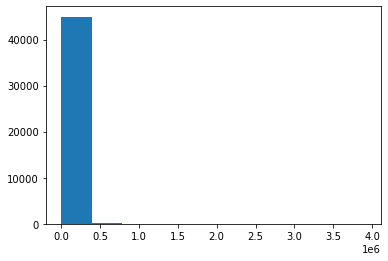

In [11]:
# Histograma de ventas
plt.hist(datos["TOTAL"])

(array([2.5027e+04, 4.7950e+03, 1.2495e+04, 1.8750e+03, 8.2400e+02,
        5.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.2000e+01]),
 array([  2100.,  14178.,  26256.,  38334.,  50412.,  62490.,  74568.,
         86646.,  98724., 110802., 122880.]),
 <BarContainer object of 10 artists>)

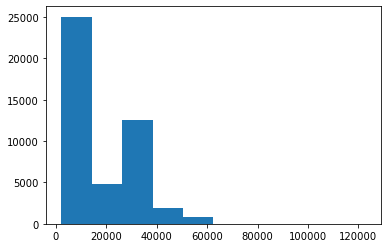

In [12]:
# Histograma de velocidad de descarga Kb
plt.hist(datos["MAX_BAJADA"])

### Varias empresas de la categoría de proveedores de internet poseen mayores velocidades en sus planes que la empresa x. Este hecho puede afectar el desempeño en ventas del servicio.

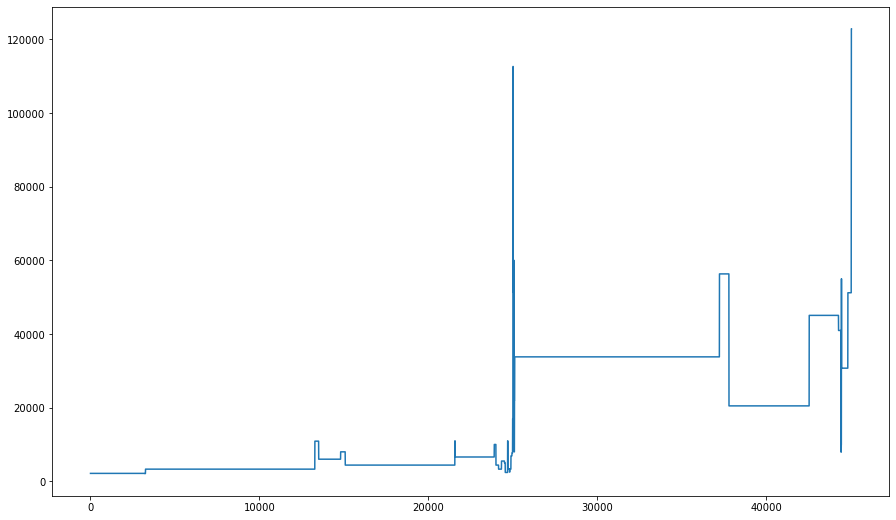

In [13]:
# Gráfica de la velocidad de descarga Kb
plot = datos["MAX_BAJADA"].plot(figsize=(15, 9))

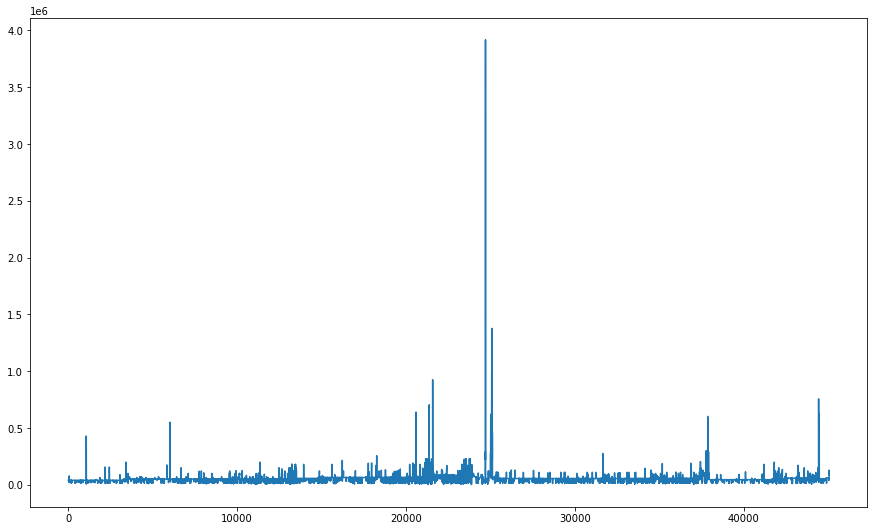

In [14]:
# Gráfica de las ventas
plot = datos["TOTAL"].plot(figsize=(15, 9))

### La variable de MES nos indica el comportamiento de las ventas durante los 12 meses del año

(array([8861., 5272., 4804., 4514., 2021., 2352., 2280., 2496., 3932.,
        8511.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

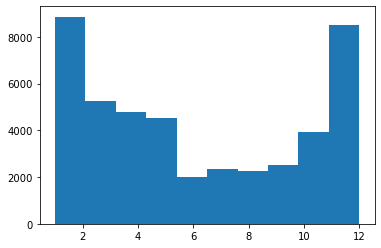

In [15]:
plt.hist(datos["MES"])

### La variable “AÑO” muestra el comportamiento de las ventas durante un periodo de tiempo y su futura variación

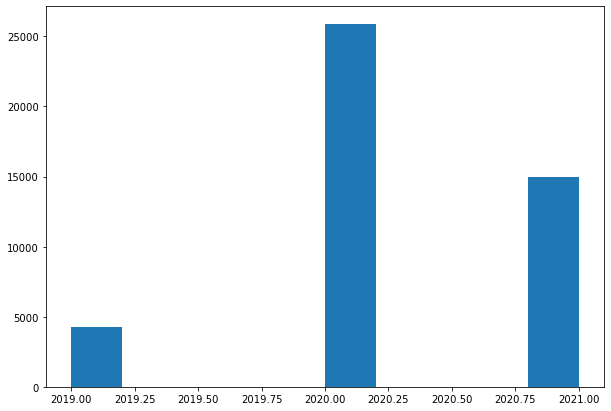

In [16]:
plt.figure(figsize=(10,7))
plt.hist(datos["AÑO"])
plt.show()

### Agrupación de datos, promedio de planes vendidos por MES y por AÑO

In [17]:
ventas_mes=datos.groupby('MES').mean()
ventas_mes['TOTAL']

MES
1     55733.222433
2     56199.910072
3     55851.443864
4     56239.157971
5     56423.344284
6     56631.385929
7     56939.447261
8     55838.984437
9     57819.219450
10    55451.479134
11    55588.542605
12    58014.692395
Name: TOTAL, dtype: float64

In [18]:
# Promedio de ventas por año
ventas_year = datos.groupby('AÑO').mean()
ventas_year['TOTAL']

AÑO
2019    53774.421004
2020    56446.953778
2021    56834.173630
Name: TOTAL, dtype: float64

### Zonas donde se realizan las ventas

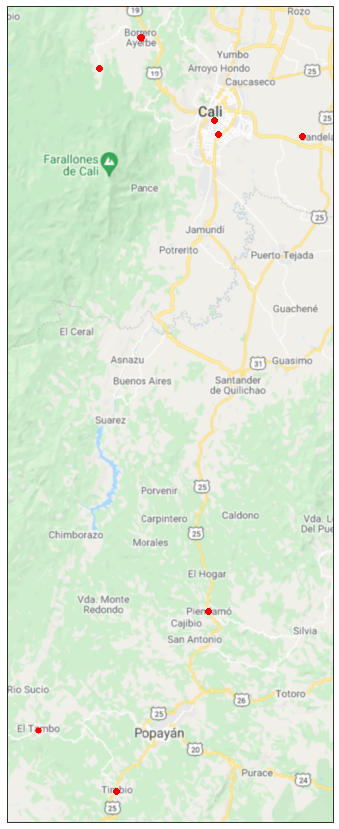

In [19]:
# conda install -c conda-forge cartopy
# Librerias
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs

plt.figure(figsize = (15, 15))

img = cimgt.GoogleTiles()

ax = plt.axes(projection = img.crs)
ax.set_extent((datos['LATITUD'].min() - 0.05, datos['LATITUD'].max() + 0.05,
               datos['LONGITUD'].min() - 0.05, datos['LONGITUD'].max() + 0.05))

ax.add_image(img, 10, interpolation = 'bicubic')

plt.scatter(datos['LATITUD'], datos['LONGITUD'], transform = ccrs.PlateCarree(),
            c = 'red', s = np.random.randint(5,50))

In [22]:
# conda install -c conda-forge cartopy
# Librerias
#import cartopy.io.img_tiles as cimgt
#import cartopy.crs as ccrs

plt.figure(figsize = (15, 10))
tiler = cimgt.Stamen('terrain-background')
mercator = tiler.crs

ax = plt.axes(projection = mercator)
ax.set_extent((datos['LATITUD'].min() - 0.05, datos['LATITUD'].max() + 0.05,
               datos['LONGITUD'].min() - 0.05, datos['LONGITUD'].max() + 0.05))

ax.add_image(tiler, 6)
ax.coastlines('10m')

plt.plot(datos['LONGITUD'], datos['LATITUD'], color = 'red', marker='o', markersize=np.random.randint(5,50), alpha=0.33)
plt.text(
        15, 15, 'f',
        color='black',
        transform=ccrs.PlateCarree()
    )
plt.show()
plt.close()